In [1]:
import datetime
from datetime import datetime as dt
import numpy as np
import pandas as pd

In [2]:
import os
# DataGenic module
from pymarketdata.datagenic import DataGenic

In [3]:
log = ag_log.get_log()

NameError: name 'ag_log' is not defined

In [7]:
# env = 'UAT'
env='PROD'

if env == 'PROD':
    path = 'OIL'
else:
    path = 'OILUAT'

In [ ]:
log.debug("datagenic connection")

In [8]:
# username = os.environ.get('DG_USERNAME')
# password = os.environ.get('DG_PASSWORD')
username = 'PIT018'
password = 'PIT018$1'

In [9]:
dg_url = "http://petro.datagenic.net:8080/"
dg = DataGenic(dg_url)
dg.connect(username, password)

print(f"DataGenic: {dg.version}")

DataGenic: Version 4.4.13.4.201, Built on 04-02-2019 09:44


In [ ]:
references_dg = pd.read_excel('I:\\Crude Oil Department\\Analytics\\wq\\DG.xlsm', sheet_name='Model')
references_crude = pd.read_excel('I:\\Crude Oil Department\\Analytics\\DG - Crude Daily Brief.xlsm', sheet_name='Model')
references = pd.concat([references_dg,references_crude])

In [ ]:
series_models = references[references.Type=='NumericSeries']['Model'].to_list()

In [5]:
from_date = datetime.date(2015, 1, 1)
to_date = datetime.date.today()

In [ ]:
series_list = []
for model in series_models:
    df = dg.get_time_series(model, from_date, to_date)
    df['Model'] = model
    series_list.append(df)

In [ ]:
series_df = pd.concat(series_list)
series_df.reset_index(inplace=True)
series_df.rename(columns={'index':'ddate', 'PRICE':'price'}, inplace=True)

In [ ]:
data_table = series_df.merge(references[['Model', 'ModelDescription']], on='Model')

In [ ]:
len(data_table)

In [ ]:
data_table = data_table.replace(',','_', regex=True)
data_table = data_table.replace("'"," ", regex=True)

In [ ]:
today = dt.now().date().strftime('%y-%m-%d')
data_table.to_csv('//petroineos.local/dfs/Department Shared Folders/~Analysis Department/ApplicationFolder/BatchUploader/{}/Upload_{}_CrudeTimeseriesRolling-{}.csv'.format(env,path,today), index=False)

print('CSV updated')

In [ ]:
data_table.ModelDescription.unique()

### ------------------------------------ad hoc request ---------------------------------------

In [13]:
barah_hvy_osp_model = 'model://PLATTS_OS/PLATTS.CRUDE.OS.AAXUC00/INDEX/ALL'
arab_hvy_nwe_osp_model = 'model://PLATTS_OS/PLATTS.CRUDE.OS.AAIQT00'
arab_hvy_med_osp_model = 'model://PLATTS_OS/PLATTS.CRUDE.OS.AAWQN00'

In [14]:
barah_hvy_osp = dg.get_time_series(barah_hvy_osp_model, from_date, to_date)
barah_hvy_osp.rename(columns={'PRICE':'basrah_hvy_osp'}, inplace=True)
arab_hvy_nwe = dg.get_time_series(arab_hvy_nwe_osp_model, from_date, to_date)
arab_hvy_nwe.rename(columns={'PRICE':'arab_hvy_nwe_osp'}, inplace=True)
arab_hvy_med = dg.get_time_series(arab_hvy_med_osp_model, from_date, to_date)
arab_hvy_med.rename(columns={'PRICE':'arab_hvy_med_osp'}, inplace=True)

In [17]:
osps_1 = barah_hvy_osp.merge(arab_hvy_nwe, left_index=True, right_index=True)
osps =  osps_1.merge(arab_hvy_med, left_index=True, right_index=True)

<AxesSubplot:>

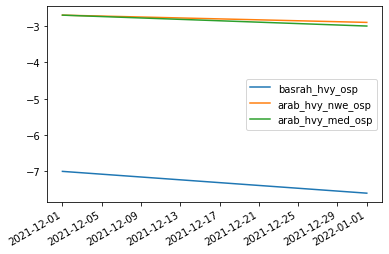

In [24]:
osps['2021-12-01':].plot(kind='line')

In [27]:
osps.to_csv('ag_osp_diffs.csv')